# Data Science Challenge

Wie beschrieben in dem file 24_09-Data_Science_Challenge.pdf sollen die öffentlich verfügbaren Daten der Firma citibikenyc (https://citibikenyc.com/) untersucht werden zusammen mit den Unfall Statistiken des NYPD.
Ziel ist es eine Analyse zu machen, sodass die Firma ihre Daten sinnvoll nutzen kann um z.B. eine Kooperation mit einer Versicherung einzugehen. Es kann auch versucht werden, die Zusammenarbeit für die Versicherung ebenfalls mit Auffinden zusätzlicher Vorteile (ausgenommen dem Vorteil eines zusätzlichen Kunden) schmackhaft zu machen.

In [1]:
# imports für das notebook
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rcParams
import datetime as dt
# importing re for regular expressions
import re

C:\Users\tzach\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"



Ziel dieses notebooks ist es einen Überblick über die Daten zu bekommen (Spalten/Größe), erste plots zu checken.
Es werden zuerst die Daten der Firma citibikenyc untersucht, anschließend die Unfall Statistik der Stadt NYC.
Außerdem sollen erste Möglichkeiten zur tiefergehenden Analyse und Korrelation der Daten aus beiden Quellen eruiert werden.

## Daten citibikenyc

Download der kompletten Daten für 2023 von https://s3.amazonaws.com/tripdata/index.html.
Es werden der Einfachheit hier nur die Daten von Januar 2023 betrachtet.

In [2]:
#Einlesen der Daten von citibikenyc

test_table_bikes = pd.read_csv("Data/2023-citibike-tripdata/202301-citibike-tripdata/202301-citibike-tripdata_1.csv")

test_table_bikes

C:\Users\tzach\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,DC1CB984821DFFF7,classic_bike,2023-01-07 15:36:53.430,2023-01-07 15:39:45.406,Vesey St & Church St,5216.06,Albany St & Greenwich St,5145.02,40.712220,-74.010472,40.709267,-74.013247,member
1,C00CA02971557F16,classic_bike,2023-01-04 19:23:01.234,2023-01-04 19:34:57.151,Lispenard St & Broadway,5391.06,St Marks Pl & 1 Ave,5626.13,40.719392,-74.002472,40.727791,-73.985649,member
2,C753AE5EBD8458F9,classic_bike,2023-01-20 09:22:19.894,2023-01-20 10:23:24.255,3 Ave & Schermerhorn St,4437.01,State St & Smith St,4522.07,40.686832,-73.979677,40.689170,-73.988600,member
3,E4415A543C1972A7,classic_bike,2023-01-24 10:38:01.135,2023-01-24 10:41:40.749,E 5 St & Ave A,5626.06,E 1 St & 1 Ave,5593.01,40.724790,-73.984301,40.723356,-73.988650,member
4,BD52A87B215877C7,electric_bike,2023-01-13 10:17:38.192,2023-01-13 10:33:59.099,W 54 St & 11 Ave,6955.05,Washington St & Gansevoort St,6039.06,40.768292,-73.992563,40.739323,-74.008119,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,58FE57A95A48C3B9,electric_bike,2023-01-16 12:56:52.115,2023-01-16 13:06:51.277,5 Ave & E 87 St,7323.09,Amsterdam Ave & W 66 St,7149.05,40.782804,-73.959659,40.774667,-73.984706,member
999996,D1E531A3C0AE3355,classic_bike,2023-01-20 06:21:24.809,2023-01-20 06:46:56.658,7 Ave & 41 St,3192.05,Duffield St & Willoughby St,4596.05,40.647379,-74.000911,40.692216,-73.984284,member
999997,3DD5E1615B32FD6F,classic_bike,2023-01-25 06:21:19.057,2023-01-25 06:49:00.240,7 Ave & 41 St,3192.05,Duffield St & Willoughby St,4596.05,40.647379,-74.000911,40.692216,-73.984284,member
999998,1AA479833FE782AE,classic_bike,2023-01-11 07:49:02.116,2023-01-11 07:58:38.117,Sterling Pl & Bedford Ave,3993.03,Plaza St West & Flatbush Ave,4010.13,40.672695,-73.954131,40.675021,-73.971115,member


In [3]:
# Überblick über mögliche Spalteneinträge
for column in ["rideable_type", "start_station_name", "start_station_id", "end_station_name", "end_station_id", "member_casual"]:
    print(column+": "+str(test_table_bikes[column].unique())+" "+str(len(test_table_bikes[column].unique())))

#check für nan und Entfernen der Zeilen
print(test_table_bikes[test_table_bikes.isnull().any(axis=1)])
print(len(test_table_bikes[test_table_bikes.isnull().any(axis=1)]))
test_table_bikes.dropna(inplace = True)
print(test_table_bikes[test_table_bikes.isnull().any(axis=1)])


rideable_type: ['classic_bike' 'electric_bike'] 2
start_station_name: ['Vesey St & Church St' 'Lispenard St & Broadway'
 '3 Ave & Schermerhorn St' ... '57 St & Grand Ave' nan 'Lab - NYC'] 1731
start_station_id: [5216.06 5391.06 4437.01 ... '4862.07' '6502.01' 'Lab - NYC'] 3454
end_station_name: ['Albany St & Greenwich St' 'St Marks Pl & 1 Ave' 'State St & Smith St'
 ... 'W 159 St & Edgecombe Ave' '34 Ave & 13 St' 'Lab - NYC'] 1328
end_station_id: ['5145.02' '5626.13' '4522.07' ... '8119.05' '6836.07' 'Lab - NYC'] 1432
member_casual: ['member' 'casual'] 2
                 ride_id  rideable_type               started_at  \
783     442B28B682230554   classic_bike  2023-01-14 11:29:29.613   
786     D55092231C9975D0  electric_bike  2023-01-25 19:04:15.533   
787     6DB5D45BDDE07354  electric_bike  2023-01-26 17:15:59.382   
789     C454224244E1AB95   classic_bike  2023-01-07 14:50:50.896   
794     A6472C7627A606F3  electric_bike  2023-01-15 12:57:20.424   
...                  ...       

In [4]:
# Konvertierung aller station_ids in strings
test_table_bikes.start_station_id = test_table_bikes.start_station_id.astype(str)
test_table_bikes.end_station_id = test_table_bikes.end_station_id.astype(str)

In [5]:
# Neue Spalten "duration", "diff_lat", "diff_lng", "direct_distance"
# Konvertierung von length/latitude DIfferenzen in Entfernungen in Meilen

test_table_bikes.dtypes

test_table_bikes["ended_at"] = pd.to_datetime(test_table_bikes["ended_at"])
test_table_bikes["started_at"] = pd.to_datetime(test_table_bikes["started_at"])

test_table_bikes["duration"] = test_table_bikes["ended_at"] - test_table_bikes["started_at"]
test_table_bikes["diff_lat"] = test_table_bikes["end_lat"] - test_table_bikes["start_lat"]
test_table_bikes["diff_lng"] = test_table_bikes["end_lng"] - test_table_bikes["start_lng"]

# unter Verwendung von https://wiki.openstreetmap.org/wiki/DE:Genauigkeit_von_Koordinaten
# 1 Längengrad Differenz entspricht auf Breite 40 Grad (NYC): 85118 Meter
# 1 Breitengrad Differenz entspricht 111120 Meter
test_table_bikes["direct_distance"] = np.sqrt(np.power(test_table_bikes["diff_lat"] * 111120, 2.0) + np.power(test_table_bikes["diff_lng"] * 85118, 2.0))


test_table_bikes

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,diff_lat,diff_lng,direct_distance
0,DC1CB984821DFFF7,classic_bike,2023-01-07 15:36:53.430,2023-01-07 15:39:45.406,Vesey St & Church St,5216.06,Albany St & Greenwich St,5145.02,40.712220,-74.010472,40.709267,-74.013247,member,0 days 00:02:51.976000,-0.002953,-0.002775,404.256275
1,C00CA02971557F16,classic_bike,2023-01-04 19:23:01.234,2023-01-04 19:34:57.151,Lispenard St & Broadway,5391.06,St Marks Pl & 1 Ave,5626.13,40.719392,-74.002472,40.727791,-73.985649,member,0 days 00:11:55.917000,0.008399,0.016823,1709.216191
2,C753AE5EBD8458F9,classic_bike,2023-01-20 09:22:19.894,2023-01-20 10:23:24.255,3 Ave & Schermerhorn St,4437.01,State St & Smith St,4522.07,40.686832,-73.979677,40.689170,-73.988600,member,0 days 01:01:04.361000,0.002338,-0.008923,802.693644
3,E4415A543C1972A7,classic_bike,2023-01-24 10:38:01.135,2023-01-24 10:41:40.749,E 5 St & Ave A,5626.06,E 1 St & 1 Ave,5593.01,40.724790,-73.984301,40.723356,-73.988650,member,0 days 00:03:39.614000,-0.001434,-0.004349,403.037529
4,BD52A87B215877C7,electric_bike,2023-01-13 10:17:38.192,2023-01-13 10:33:59.099,W 54 St & 11 Ave,6955.05,Washington St & Gansevoort St,6039.06,40.768292,-73.992563,40.739323,-74.008119,member,0 days 00:16:20.907000,-0.028969,-0.015556,3480.772100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,58FE57A95A48C3B9,electric_bike,2023-01-16 12:56:52.115,2023-01-16 13:06:51.277,5 Ave & E 87 St,7323.09,Amsterdam Ave & W 66 St,7149.05,40.782804,-73.959659,40.774667,-73.984706,member,0 days 00:09:59.162000,-0.008137,-0.025047,2315.729277
999996,D1E531A3C0AE3355,classic_bike,2023-01-20 06:21:24.809,2023-01-20 06:46:56.658,7 Ave & 41 St,3192.05,Duffield St & Willoughby St,4596.05,40.647379,-74.000911,40.692216,-73.984284,member,0 days 00:25:31.849000,0.044837,0.016627,5179.374702
999997,3DD5E1615B32FD6F,classic_bike,2023-01-25 06:21:19.057,2023-01-25 06:49:00.240,7 Ave & 41 St,3192.05,Duffield St & Willoughby St,4596.05,40.647379,-74.000911,40.692216,-73.984284,member,0 days 00:27:41.183000,0.044837,0.016627,5179.374702
999998,1AA479833FE782AE,classic_bike,2023-01-11 07:49:02.116,2023-01-11 07:58:38.117,Sterling Pl & Bedford Ave,3993.03,Plaza St West & Flatbush Ave,4010.13,40.672695,-73.954131,40.675021,-73.971115,member,0 days 00:09:36.001000,0.002326,-0.016984,1468.539219


Check der Stationen: IDs und Namen, Verteilung, Vorkommen im Datenset

In [6]:
# Überblick über die Stationen
# 1. a) mittels station_ids "5626.13" (Zahl + dot + Zahl):
station_id_full_start_unique = test_table_bikes.start_station_id.unique()
print("StationID full unique start: "+str(len(station_id_full_start_unique)))
station_id_full_end_unique = test_table_bikes.end_station_id.unique()
print("StationID full unique end: "+str(len(station_id_full_end_unique)))
station_id_full = pd.concat([pd.DataFrame(station_id_full_start_unique), pd.DataFrame(station_id_full_end_unique)]).reset_index()
station_id_full_unique = station_id_full[0].unique()
print("StationID full unique: "+str(len(station_id_full_unique)))

# 1. b) mittels station_ids "5626" (Zahl ohne (dot + Zahl)):
station_id_start_unique = test_table_bikes.start_station_id.astype("string").str.split(".", n=1, expand=True)[0].unique()
print("StationID part unique start: "+str(len(station_id_start_unique)))
station_id_end_unique = test_table_bikes.end_station_id.astype("string").str.split(".", n=1, expand=True)[0].unique()
print("StationID part unique end: "+str(len(station_id_end_unique)))
station_id = pd.concat([pd.DataFrame(station_id_start_unique), pd.DataFrame(station_id_end_unique)]).reset_index()
station_id_unique = station_id[0].unique()
print("StationID part unique: "+str(len(station_id_unique)))

# 2. mittels station_name
station_name_start_unique = test_table_bikes.start_station_name.unique()
print("Station name unique start: "+str(len(station_name_start_unique)))
station_name_end_unique = test_table_bikes.end_station_name.unique()
print("Station name unique end: "+str(len(station_name_end_unique)))
station_name = pd.concat([pd.DataFrame(station_name_start_unique), pd.DataFrame(station_name_end_unique)]).reset_index()
station_name_unique = station_name[0].unique()
print("Station name unique: "+str(len(station_name_unique)))


StationID full unique start: 1812
StationID full unique end: 1335
StationID full unique: 1833
StationID part unique start: 1453
StationID part unique end: 1147
StationID part unique: 1474
Station name unique start: 1730
Station name unique end: 1327
Station name unique: 1751


In [7]:
# Check Zusammenhang station name und station id
names_ids_stations = list(zip(test_table_bikes.start_station_name, test_table_bikes.start_station_id))
names_ids_stations_unique = set(names_ids_stations)
names_ids_stations_unique

names_2_ids = {}
for t in names_ids_stations_unique:
    if t[0] in names_2_ids.keys():
        names_2_ids[t[0]].append(t[1])
    else:
        names_2_ids[t[0]] = [t[1]]

count = 0
for key in names_2_ids.keys():
    if len(names_2_ids[key]) > 1:
        count = count + 1
        print(str(count) + ": " + key + " " + str(names_2_ids[key]))


1: Dawson St & Intervale Ave ['7888.10', '7888.1']
2: St Ann's Ave & Westchester Ave ['7835.1', '7835.10']
3: Brevoort Pl & Bedford Ave ['4181.1', '4181.10']
4: W 163 St & Edgecombe Ave ['8153.1', '8153.10']
5: Longwood Ave & Southern Blvd ['7849.1', '7849.10']
6: Broadway & W 58 St ['6948.10', '6948.1']
7: N 6 St & Bedford Ave ['5379.10', '5379.1']
8: Central Ave & Decatur St ['4432.10', '4432.1']
9: Walton Ave & E 171 St ['8249.10', '8249.1']
10: Van Brunt St & Van Dyke St ['4095.1', '4095.10']
11: Reade St & Broadway ['5247.10', '5247.1']
12: Madison St & Malcolm X Blvd ['4416.1', '4416.10']
13: Lenox Ave & W 115 St ['7627.10', '7627.1']
14: Allen St & Hester St ['5342.1', '5342.10']
15: Kent St & McGuinness Blvd ['5785.1', '5785.10']
16: Herkimer St & Eastern Pkwy ['4129.1', '4129.10']
17: Central Ave & Woodbine St ['4632.1', '4632.10']
18: W 144 St & Adam Clayton Powell Blvd ['7932.1', '7932.10']
19: Stephen St & Seneca Ave ['4798.1', '4798.10']
20: E 9 St & 5 Ave ['5872.10', '587

In [8]:
# Bereinigen der station IDs sodass '5332.1' = '5332.10'

test_table_bikes_cleaned = test_table_bikes.copy()

test_table_bikes_cleaned.start_station_id = test_table_bikes_cleaned.start_station_id.apply(lambda string : string if re.match(r'.*[a-zA-Z].*', string) else str("{:.2f}".format(float(string))))
test_table_bikes_cleaned.end_station_id = test_table_bikes_cleaned.end_station_id.apply(lambda string : string if re.match(r'.*[a-zA-Z].*', string) else str("{:.2f}".format(float(string))))


In [9]:

# Nun noch einmal Check Station IDs/Namen:
# Überblick über die Stationen
# 1. a) mittels station_ids "5626.13" (Zahl + dot + Zahl):
station_id_full_start_unique = test_table_bikes_cleaned.start_station_id.unique()
print("StationID full unique start: "+str(len(station_id_full_start_unique)))
station_id_full_end_unique = test_table_bikes_cleaned.end_station_id.unique()
print("StationID full unique end: "+str(len(station_id_full_end_unique)))
station_id_full = pd.concat([pd.DataFrame(station_id_full_start_unique), pd.DataFrame(station_id_full_end_unique)]).reset_index()
station_id_full_unique = station_id_full[0].unique()
print("StationID full unique: "+str(len(station_id_full_unique)))

# 2. mittels station_name
station_name_start_unique = test_table_bikes_cleaned.start_station_name.unique()
print("Station name unique start: "+str(len(station_name_start_unique)))
station_name_end_unique = test_table_bikes_cleaned.end_station_name.unique()
print("Station name unique end: "+str(len(station_name_end_unique)))
station_name = pd.concat([pd.DataFrame(station_name_start_unique), pd.DataFrame(station_name_end_unique)]).reset_index()
station_name_unique = station_name[0].unique()
print("Station name unique: "+str(len(station_name_unique)))

StationID full unique start: 1730
StationID full unique end: 1327
StationID full unique: 1751
Station name unique start: 1730
Station name unique end: 1327
Station name unique: 1751


plots

,longitude,latitude,usage
Vesey St & Church St,-74.010472,40.712220,2463
Lispenard St & Broadway,-74.002286,40.719225,1116
3 Ave & Schermerhorn St,-73.979677,40.686832,746
E 5 St & Ave A,-73.984301,40.724790,1741
W 54 St & 11 Ave,-73.992573,40.768333,5495
...,...,...,...
City Hall - Washington St & 1 St,-74.030970,40.737360,1
Hilltop,-74.057574,40.731169,1
Morgan Bike Mechanics,-73.931457,40.709628,4
Marin Light Rail,-74.042817,40.714584,5


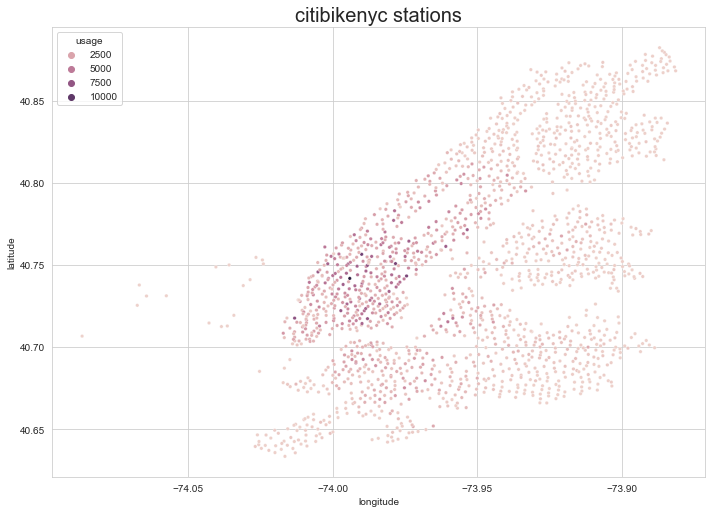

In [10]:
# erste plots
#Verteilung der Stationen (alle start/end lat/lng)
#get number of occurences of different stations
n_occurences_start = test_table_bikes_cleaned['start_station_name'].value_counts().to_dict()
n_occurences_end = test_table_bikes_cleaned['end_station_name'].value_counts().to_dict()
n_occurences = {key: n_occurences_start.get(key, 0) + n_occurences_end.get(key, 0) for key in set(n_occurences_start) | set(n_occurences_end)}
df_n_occurences = pd.DataFrame.from_dict(n_occurences, orient='index').rename(columns={0: 'usage'})


# iterate through table and form map with coordinates of different stations
start_station_names_to_coords = pd.Series(list(zip(test_table_bikes_cleaned['start_lng'], test_table_bikes_cleaned['start_lat'])), index=test_table_bikes_cleaned.start_station_name).to_dict()
end_station_names_to_coords = pd.Series(list(zip(test_table_bikes_cleaned['end_lng'], test_table_bikes_cleaned['end_lat'])), index=test_table_bikes_cleaned.end_station_name).to_dict()

station_names_to_coords = start_station_names_to_coords
station_names_to_coords.update(end_station_names_to_coords)
station_names_to_coords
#len(station_names_to_coords)
df_coords = pd.DataFrame.from_dict(station_names_to_coords, orient='index')
df_coords = df_coords.rename(columns={0: 'longitude', 1: 'latitude'})
df_coords = df_coords.join(df_n_occurences)

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
sns.set_style("whitegrid")
sns.scatterplot(data=df_coords, x="longitude", y="latitude", s=12, hue='usage').set_title("citibikenyc stations", size=20)
df_coords

#print(n_occurences_start["W 54 St & 11 Ave"])
#print(n_occurences_end["W 54 St & 11 Ave"])
#df_coords

Text(0.5, 1.0, 'Distribution of start hour of rent during day')

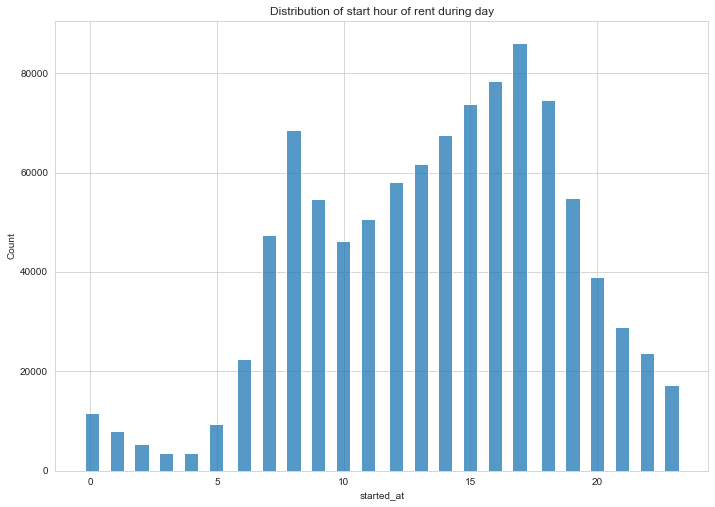

In [11]:
# Verteilung Ausleih Startzeiten/Endzeiten

start_times = pd.DataFrame(test_table_bikes_cleaned["started_at"])
end_times = pd.DataFrame(test_table_bikes_cleaned["ended_at"])

times = pd.concat([start_times, end_times], axis=1)
times["started_at"] = times["started_at"].dt.hour
times["ended_at"] = times["ended_at"].dt.hour        
times

sns.histplot(data=times, x="started_at", shrink = 4).set_title("Distribution of start hour of rent during day")

klar sichtbar: superposition 2er Verteilungen: einer Arbeits/Berufsverkehr Verteilung, welche um 8 Uhr Morgens und 17 Nachmittags peaked und einer Basis-Verteilung von Ausleihen, welche wahrscheinlich um 14/15 Uhr peaked. Hierdurch könnte man grob den Anteil des reinen Berufsverkehrs/transits in den Ausleihen schätzen. Weg zur Arbeit könnte Versicherungs-technisch besonders relevant sein...

Text(0.5, 1.0, 'Distribution of end hour of rent during day')

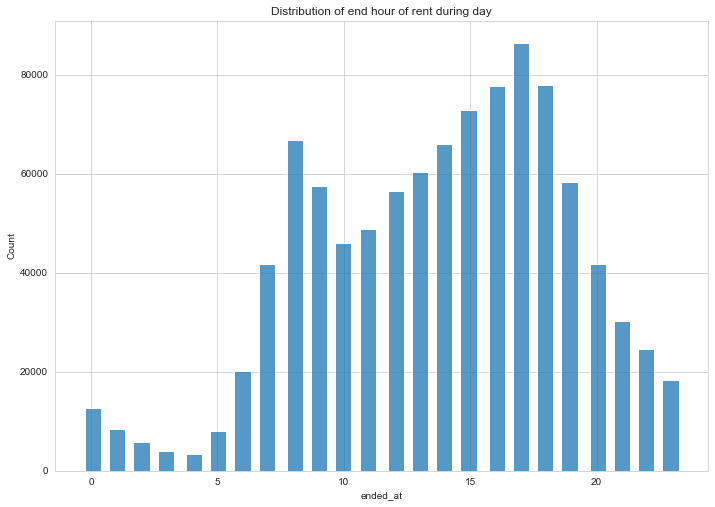

In [12]:
sns.histplot(data=times, x="ended_at", shrink = 4).set_title("Distribution of end hour of rent during day")

Text(0.5, 1.0, 'Distribution of rent lengths')

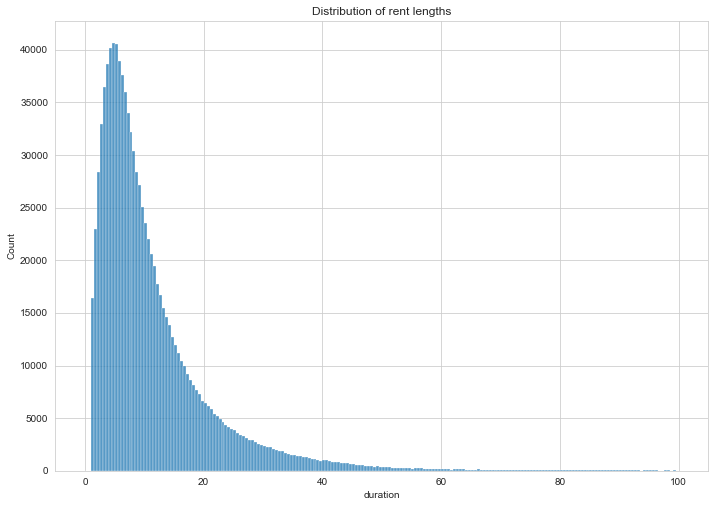

In [13]:
# Verteilung duration
duration = pd.DataFrame(test_table_bikes_cleaned["duration"].dt.total_seconds() / 60)
#remove 50 largest values as some quite large outliers
duration = duration.drop(duration["duration"].sort_values().tail(50).index)
duration

sns.histplot(data=duration, x="duration", bins=200, binrange=(0,100)).set_title("Distribution of rent lengths")

Text(0.5, 1.0, 'Distribution of direct distance between start/end point of trip')

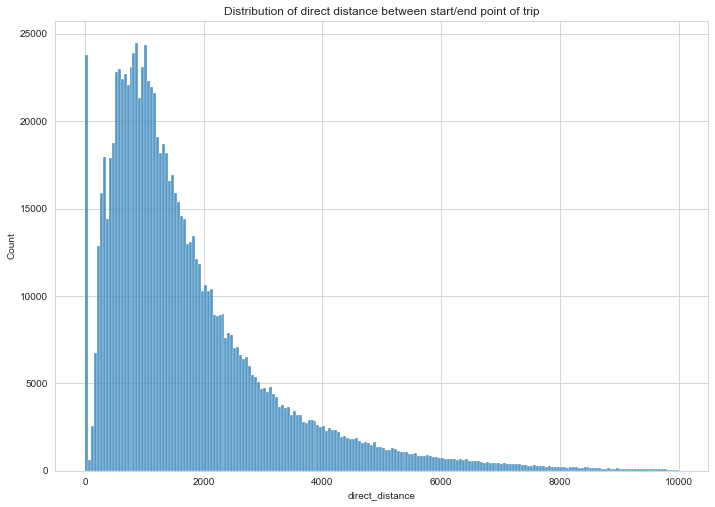

In [14]:
# Verteilung direct distances End-Startpunkt
sns.histplot(data=test_table_bikes_cleaned, x="direct_distance", bins=200, binrange=(0,10000)).set_title("Distribution of direct distance between start/end point of trip")

Text(0.5, 1.0, 'classic or electrical')

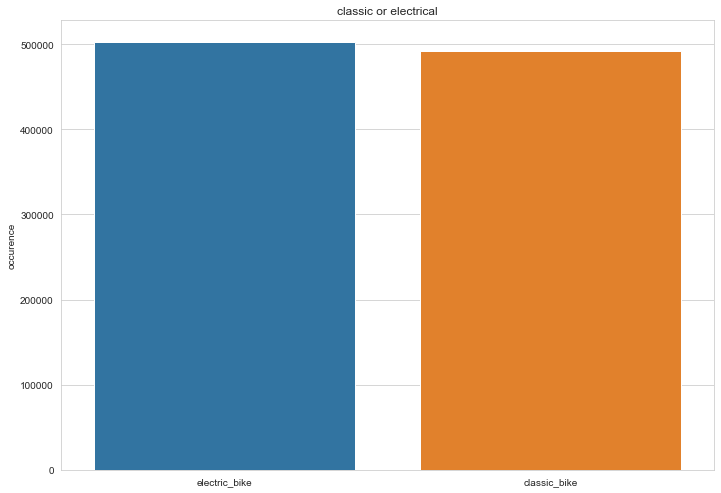

In [15]:
# classical bike vs electric bike
df_types = pd.DataFrame(test_table_bikes_cleaned["rideable_type"].value_counts())
df_types.rename(columns = {"rideable_type": "occurence"}, inplace=True)
df_types
sns.barplot(data=df_types, x=df_types.index, y="occurence").set_title("classic or electrical")

## Unfall Statistik NYC

Download als csv Datei von https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95/about_data


In [16]:
#Einlesen der Unfall Daten von NYC
table_accidents = pd.read_csv("Data/Motor_Vehicle_Collisions_-_Crashes_20250319.csv")

table_accidents.dtypes

C:\Users\tzach\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE COD

In [17]:
#crash_dates = list(table_accidents["CRASH DATE"].unique())
#print(crash_dates)

In [18]:
table_accidents

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230.0,40.621790,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2162654,03/15/2025,0:00,MANHATTAN,10011.0,40.737858,-73.996704,"(40.737858, -73.996704)",NaN,NaN,541 AVENUE OF THE AMERICAS,...,Unspecified,NaN,NaN,NaN,4799150,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
2162655,03/15/2025,14:08,NaN,NaN,40.623123,-74.167595,"(40.623123, -74.167595)",LISK AVE,SOUTH AVE,NaN,...,Unspecified,NaN,NaN,NaN,4799203,Taxi,Pick-up Truck,NaN,NaN,NaN
2162656,03/15/2025,10:09,NaN,NaN,40.787760,-73.791370,"(40.78776, -73.79137)",CROSS ISLAND PARKWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,4798984,Sedan,NaN,NaN,NaN,NaN
2162657,03/15/2025,17:30,QUEENS,11373.0,40.746740,-73.883640,"(40.74674, -73.88364)",NaN,NaN,40-31 82 ST,...,Unspecified,NaN,NaN,NaN,4799434,Sedan,Sedan,NaN,NaN,NaN


In [19]:
# check NaNs for injury/death numbers
column_list = ["CRASH DATE", "CRASH_TIME", "NUMBER OF PERSONS INJURED", "NUMBER OF PERSONS KILLED", "NUMBER OF PEDESTRIANS INJURED", "NUMBER OF PEDESTRIANS KILLED",\
               "NUMBER OF CYCLIST INJURED", "NUMBER OF CYCLIST KILLED", "NUMBER OF MOTORIST INJURED", "NUMBER OF MOTORIST KILLED"]
table_injuries_deaths = table_accidents[[c for c in table_accidents.columns if c in column_list]]

print("injury/deaths columns: ")
print("Rows before dropping nans: " + str(len(table_injuries_deaths)))
table_injuries_deaths.dropna(inplace =True)
print("Rows after dropping nans: " + str(len(table_injuries_deaths)))

injury/deaths columns: 
Rows before dropping nans: 2162659
Rows after dropping nans: 2162622


C:\Users\tzach\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [20]:
# check NaNs for longitude/latitude
table_long_lat = table_accidents[["LATITUDE", "LONGITUDE"]]

print("long/lat columns: ")
print("Rows before dropping nans: " + str(len(table_long_lat)))
table_long_lat.dropna(inplace =True)
print("Rows after dropping nans: " + str(len(table_long_lat)))

long/lat columns: 
Rows before dropping nans: 2162659
Rows after dropping nans: 1922887


In [21]:
# check NaNs for vehicle 1 info
table_vehicle_1 = table_accidents[["CONTRIBUTING FACTOR VEHICLE 1", "VEHICLE TYPE CODE 1"]]

print("vehicle 1 columns: ")
print("Rows before dropping nans: " + str(len(table_vehicle_1)))
table_vehicle_1.dropna(inplace =True)
print("Rows after dropping nans: " + str(len(table_vehicle_1)))

vehicle 1 columns: 
Rows before dropping nans: 2162659
Rows after dropping nans: 2144541
